In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2303,F,0.58,0.455,0.120,0.9400,0.3990,0.257,0.265,11
1529,M,0.74,0.570,0.180,1.8725,0.9115,0.427,0.446,10
3528,I,0.35,0.265,0.085,0.1735,0.0775,0.034,0.056,6


In [4]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df=pd.DataFrame(data=df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

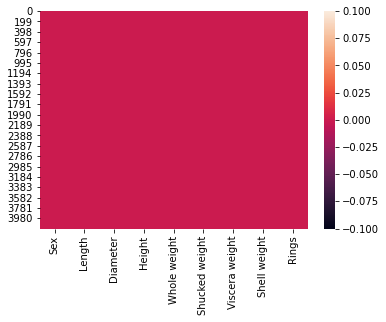

In [8]:
sns.heatmap(df.isnull())

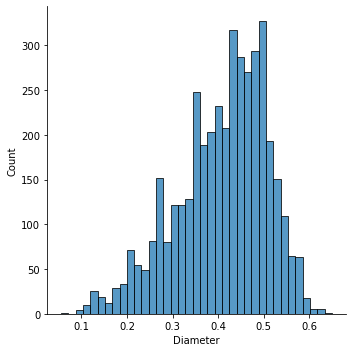

In [9]:
sns.displot(df['Diameter'])

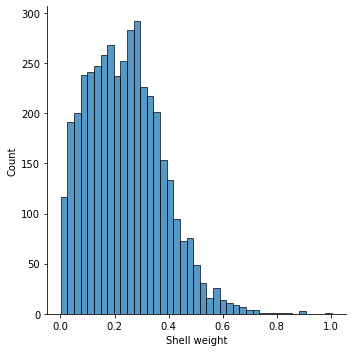

In [10]:
sns.displot(df['Shell weight'])

In [11]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [12]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [13]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


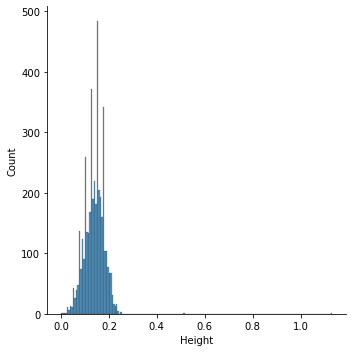

In [14]:
sns.displot(df['Height'])

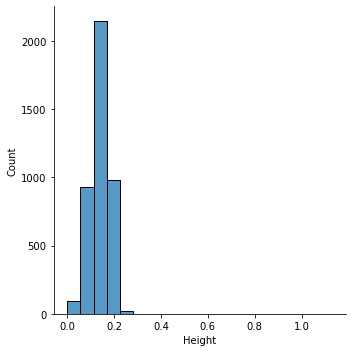

In [15]:
sns.displot(df['Height'],bins=20)

In [16]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

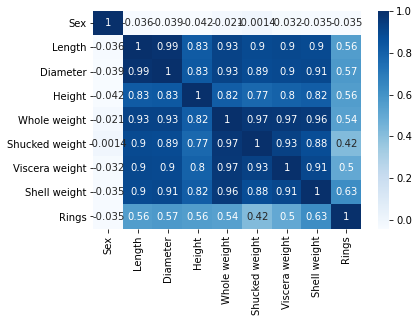

In [18]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [21]:
x.shape

(4177, 8)

In [22]:
x.shape[1]

8

In [23]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    

In [24]:
vif_calc()

   VIF Factor        features
0    2.555356             Sex
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


In [25]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [26]:
x=df.iloc[:,:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [38]:
x.shape

(4177, 6)

In [27]:
vif_calc()

   VIF Factor        features
0    2.532536             Sex
1   46.978990        Diameter
2   41.650431          Height
3  123.993316    Whole weight
4   59.292682  Viscera weight
5   49.403495    Shell weight


<AxesSubplot:>

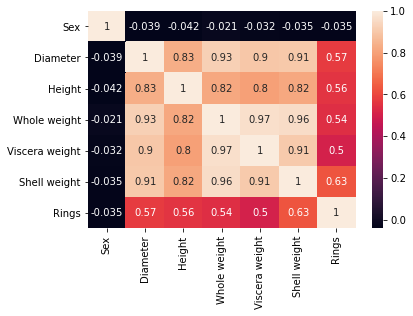

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
df.skew()

Sex              -0.098155
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [30]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.12707158, -0.54986033, -1.12451192, -0.57676568, -0.69328289,
        -0.587809  ],
       [ 1.12707158, -1.38733299, -1.26439579, -1.35176054, -1.33295268,
        -1.33241968],
       [-1.30793479,  0.00853714, -0.06482301, -0.19809927, -0.25513514,
        -0.09826193],
       ...,
       [ 1.12707158,  0.64519089,  1.56508168,  0.77794363,  1.01560749,
         0.59839786],
       [-1.30793479,  0.76992788,  0.30708344,  0.63387374,  0.81518436,
         0.51914542],
       [ 1.12707158,  1.72628889,  1.34794324,  1.93732306,  1.61134422,
         1.65848824]])

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.12707158, -0.54986033, -1.12451192, -0.57676568, -0.69328289,
        -0.587809  ],
       [ 1.12707158, -1.38733299, -1.26439579, -1.35176054, -1.33295268,
        -1.33241968],
       [-1.30793479,  0.00853714, -0.06482301, -0.19809927, -0.25513514,
        -0.09826193],
       ...,
       [ 1.12707158,  0.64519089,  1.56508168,  0.77794363,  1.01560749,
         0.59839786],
       [-1.30793479,  0.76992788,  0.30708344,  0.63387374,  0.81518436,
         0.51914542],
       [ 1.12707158,  1.72628889,  1.34794324,  1.93732306,  1.61134422,
         1.65848824]])

In [32]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(4177, 7)

In [33]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  358,
        362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
        526,  530,  572,  628,  673,  674,  675,  678,  694,  696,  719,
        720,  744,  754,  756,  811,  891,  891, 1048, 1051, 1052, 1204,
       1206, 1207, 1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428,
       1429, 1757, 1759, 1762, 1762, 1763, 1763, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811, 2863, 2863,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3599, 3628, 3715, 3715, 3715, 3800, 3837, 3899, 3924,
       3930, 3944, 3996, 4145, 4148], dtype=int64)

In [34]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [35]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 7)
(4050, 7)


In [36]:
loss_percent=((4177-4050)/4177)*100
print(loss_percent)

3.040459660043093


In [38]:
features=df.drop("Rings",axis=1)
target=df["Rings"]

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
for i in range(0,1000):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training academy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the training academy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training academy is:-0.4516563526425349
At random state 0, the training academy is:-0.47989079848260174


At random state 1, the training academy is:-0.4672774438894153
At random state 1, the training academy is:-0.4190163442727467


At random state 2, the training academy is:-0.45540604073374835
At random state 2, the training academy is:-0.4416997793619841


At random state 3, the training academy is:-0.46628668383616745
At random state 3, the training academy is:-0.4214118054135424


At random state 4, the training academy is:-0.46037598546335645
At random state 4, the training academy is:-0.445636013759688


At random state 5, the training academy is:-0.4735220679280304
At random state 5, the training academy is:-0.3959254918103504


At random state 6, the training academy is:-0.4465950421369501
At random state 6, the training academy is:-0.5029772213081121


At random state 7, the training academy is:-0.4512009249389275
At random state 7, the training academ

In [42]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=76)

In [43]:
lr.fit(features_train,target_train)

LinearRegression()

In [44]:
pred_test=lr.predict(features_test)

In [45]:
print(r2_score(target_test,pred_test))

0.4584806464247724


In [46]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.4317882863991056 and accuracy score for training is -0.441654697909561and accuracy for the testing is 0.4584806464247724


At cross fold3 the cv score is 0.40541365257388495 and accuracy score for training is -0.441654697909561and accuracy for the testing is 0.4584806464247724


At cross fold4 the cv score is 0.2466838279156109 and accuracy score for training is -0.441654697909561and accuracy for the testing is 0.4584806464247724


At cross fold5 the cv score is 0.32224965144653145 and accuracy score for training is -0.441654697909561and accuracy for the testing is 0.4584806464247724


At cross fold6 the cv score is 0.2613952643954915 and accuracy score for training is -0.441654697909561and accuracy for the testing is 0.4584806464247724


At cross fold7 the cv score is 0.35124258121161606 and accuracy score for training is -0.441654697909561and accuracy for the testing is 0.4584806464247724


At cross fold8 the cv score is 0.2477893317249081 and accurac

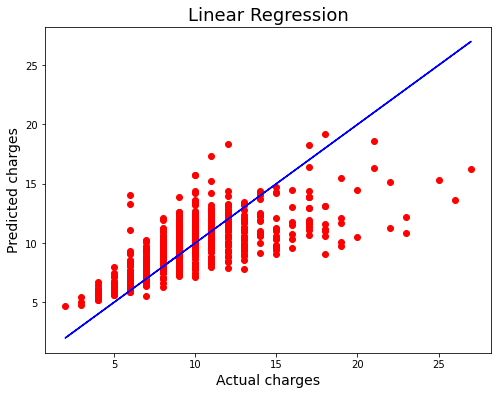

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.linear_model import Lasso
parameters={'alpha': [.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [50]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.4569163840816769

In [52]:
cv_score=cross_val_score(ls,features,target,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.43674917479142655

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [54]:
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=2)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 49.55920797281749
Cross Val Score: 48.53064647311362


In [55]:
import pickle
filename='abalone.pkl'
pickle.dump(rf,open(filename,'wb'))